# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="assets/bricks.jpg" />

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors = pd.read_csv("data/colors.csv")
colors.head()

,id,name,rgb,is_trans,num_parts,num_sets,y1,y2
0,-1,[Unknown],0033B2,False,17,2,2000.0,2000.0
1,0,Black,05131D,False,780811,215748,1957.0,2025.0
2,1,Blue,0055BF,False,197734,47820,1949.0,2025.0
3,2,Green,237841,False,84838,25194,1949.0,2025.0
4,3,Dark Turquoise,008F9B,False,21030,5565,1998.0,2025.0


In [3]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         273 non-null    int64  
 1   name       273 non-null    object 
 2   rgb        273 non-null    object 
 3   is_trans   273 non-null    bool   
 4   num_parts  273 non-null    int64  
 5   num_sets   273 non-null    int64  
 6   y1         261 non-null    float64
 7   y2         261 non-null    float64
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 15.3+ KB


In [4]:
colors["name"].nunique()

273

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
colors["is_trans"].value_counts()

is_trans
False    228
True      45
Name: count, dtype: int64

In [6]:
colors.groupby("is_trans").count()

,id,name,rgb,num_parts,num_sets,y1,y2
is_trans,,,,,,,
False,228,228,228,228,228,218,218
True,45,45,45,45,45,43,43


In [7]:
print("Number of transparent colors:", colors["is_trans"].sum())
print("Number of transparent colors:", len(colors["is_trans"]) - colors["is_trans"].sum())

Number of transparent colors: 45
Number of transparent colors: 228


**Challenge**: Change this into an h3 section heading:

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src="assets/lego_themes.png" />

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png

<img src="assets/lego_sets.png" />

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [8]:
sets = pd.read_csv("data/sets.csv")
sets

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
...,...,...,...,...,...,...
25665,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
25666,YOTO-1,"1, 2, 3 Play with Me YOTO Cards",2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-1.jpg
25667,YOTO-2,A is for Alphabet,2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-2.jpg
25668,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [9]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25670 entries, 0 to 25669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    25670 non-null  object
 1   name       25670 non-null  object
 2   year       25670 non-null  int64 
 3   theme_id   25670 non-null  int64 
 4   num_parts  25670 non-null  int64 
 5   img_url    25670 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


In [10]:
sets.loc[[sets["year"].idxmin()]]

,set_num,name,year,theme_id,num_parts,img_url
15505,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
sets_num = sets[sets["year"] == 1949]["set_num"].nunique()
print("Number of different sets LEGO sold in their first year:", sets_num)
# sets[sets["year"]==1949]["set_num"]

Number of different sets LEGO sold in their first year: 5


In [12]:
types_num = sets[sets["year"] == 1949]["name"].nunique()
print("Number of different products LEGO offered in their first year:", sets_num)
# sets[sets["year"]==1949]["name"]

Number of different products LEGO offered in their first year: 5


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [13]:
sets.sort_values(by="num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts,img_url
5033,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
489,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
23988,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...
475,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
456,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [14]:
sets_by_year = sets.groupby("year").count()
sets_by_year

,set_num,name,theme_id,num_parts,img_url
year,,,,,
1949,5,5,5,5,5
1950,6,6,6,6,6
1953,4,4,4,4,4
1954,14,14,14,14,14
1955,39,39,39,39,39
...,...,...,...,...,...
2022,1217,1217,1217,1217,1217
2023,1141,1141,1141,1141,1141
2024,1225,1225,1225,1225,1225


In [15]:
set_diff = sets_by_year.loc[2019, "set_num"] - sets_by_year.loc[1955, "set_num"]
print("Difference of number of LEGO sets released in 1955 and 2019:", set_diff)

Difference of number of LEGO sets released in 1955 and 2019: 1067


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [16]:
sets_by_year.drop([2026], axis=0, inplace=True)

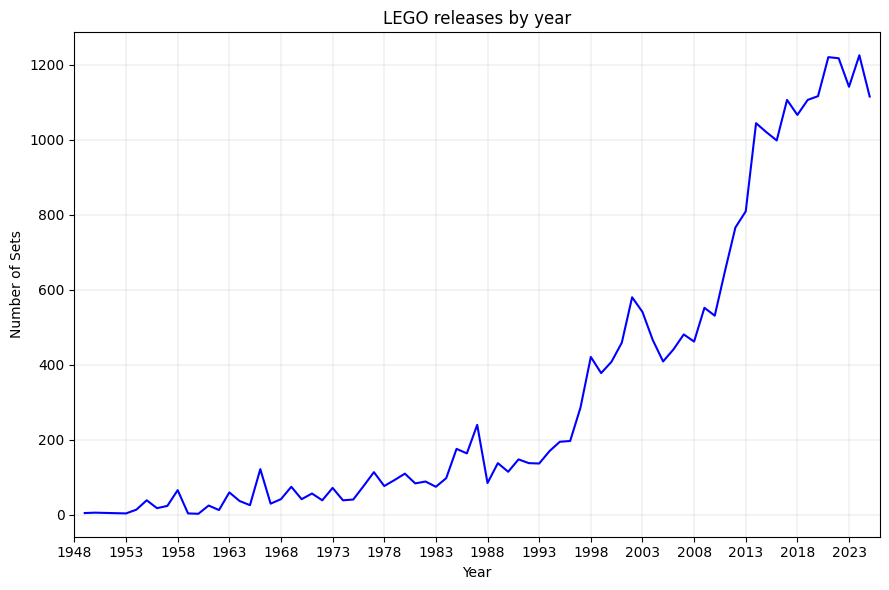

In [17]:
ax = sets_by_year["set_num"].plot(
    figsize=(9, 6),
    title="LEGO releases by year",
    xlim=(1948, 2026),
    xlabel="Year",
    ylabel="Number of Sets",
    xticks=range(1948, 2027, 5),
    color="blue",
)
ax.grid(True, linewidth=0.2)
plt.tight_layout()
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [18]:
themes_by_year = sets.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year.rename(columns={"theme_id": "nr_themes"}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,6
...,...
2022,99
2023,109
2024,108


In [19]:
themes_by_year.drop([2026], axis=0, inplace=True)

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

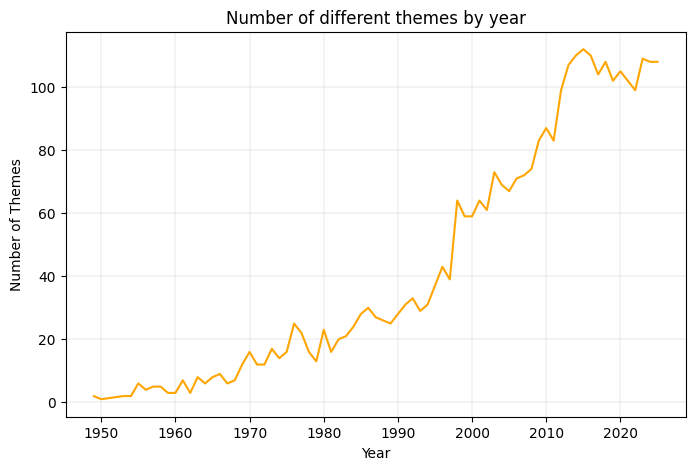

In [20]:
plt.figure(figsize=(8, 5))
plt.title("Number of different themes by year")
plt.plot(themes_by_year, c="orange")
plt.xlabel("Year")
plt.ylabel("Number of Themes")
plt.grid(True, linewidth=0.2)
plt.show()

### Line Charts with Two Seperate Axes

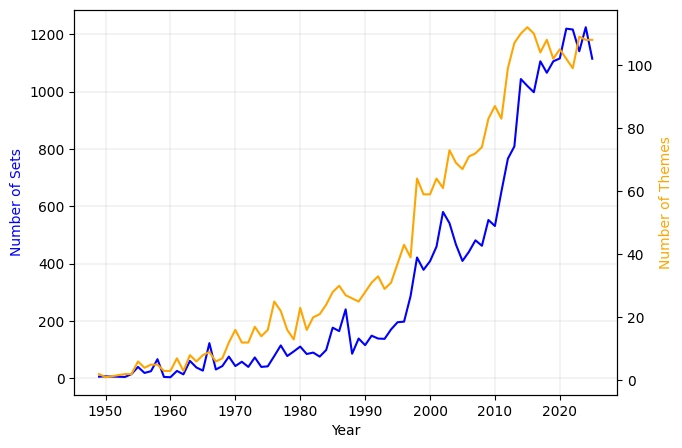

In [21]:
plt.figure(figsize=(7, 5))

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()  # allows ax1 and ax2 to share the same x-axis

ax1.plot(sets_by_year["set_num"], color="blue")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color="blue")
ax1.grid(linewidth=0.2)

ax2.plot(themes_by_year, color="orange")
ax2.set_ylabel("Number of Themes", color="orange")

plt.show()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [22]:
parts_per_set = sets.groupby("year").agg({"num_parts": pd.Series.mean})
parts_per_set.rename(columns={"num_parts": "avg_num_parts"}, inplace=True)
parts_per_set.drop([2026], axis=0, inplace=True)
parts_per_set

,avg_num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,12.256410
...,...
2021,217.681148
2022,232.032046
2023,264.115688


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

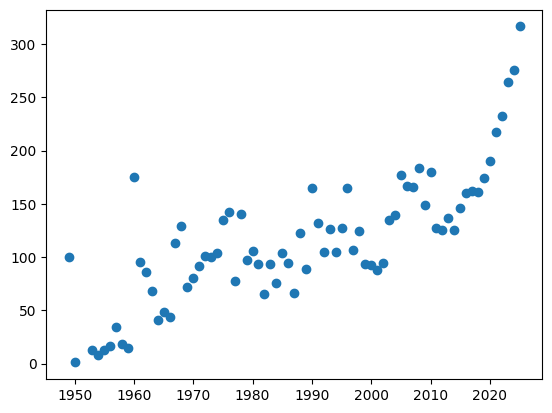

In [23]:
plt.scatter(
    x=parts_per_set.index,
    y=parts_per_set.values,
)
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [84]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count

theme_id
158    993
503    796
777    760
739    648
494    639
      ... 
104      1
241      1
497      1
147      1
414      1
Name: count, Length: 476, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="assets/rebrickable_schema.png" />

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [32]:
themes = pd.read_csv("data/themes.csv")
themes

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0
...,...,...,...
477,781,The Infinity Saga,696.0
478,782,Captain America,696.0
479,783,Incredibles 2,591.0
480,784,Spider-Man - Across the Spider-Verse,535.0


In [48]:
star_wars_filter = themes["name"].apply(lambda x: x in "Star Wars")
star_wars_themes = themes[star_wars_filter].copy()
star_wars_themes

,id,name,parent_id
5,18,Star Wars,1.0
74,158,Star Wars,NaN
95,209,Star Wars,207.0
122,261,Star Wars,258.0


In [69]:
star_wars_sets_mask = sets["theme_id"].isin(star_wars_themes["id"])
star_wars_sets = sets[star_wars_sets_mask]
star_wars_sets

,set_num,name,year,theme_id,num_parts,img_url
2449,20006-1,Clone Turbo Tank,2008,158,64,https://cdn.rebrickable.com/media/sets/20006-1...
2460,20007-1,Republic Attack Cruiser,2009,158,84,https://cdn.rebrickable.com/media/sets/20007-1...
2473,20009-1,AT-TE Walker,2009,158,94,https://cdn.rebrickable.com/media/sets/20009-1...
2477,20010-1,Republic Gunship,2009,158,94,https://cdn.rebrickable.com/media/sets/20010-1...
2501,20016-1,Imperial Shuttle,2010,158,70,https://cdn.rebrickable.com/media/sets/20016-1...
...,...,...,...,...,...,...
25614,VP-4,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-4.jpg
25617,VP-8,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-8.jpg
25663,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
25664,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...


In [85]:
set_theme_count = pd.DataFrame({
    "id": set_theme_count.index,
    "set_count": set_theme_count.values
})
set_theme_count

,id,set_count
0,158,993
1,503,796
2,777,760
3,739,648
4,494,639
...,...,...
471,104,1
472,241,1
473,497,1
474,147,1


### Merging (i.e., Combining) DataFrames based on a Key

In [92]:
merged_df = set_theme_count.merge(themes, on="id")
merged_df

,id,set_count,name,parent_id
0,158,993,Star Wars,NaN
1,503,796,Key Chain,501.0
2,777,760,"Bags, Totes, & Luggage",501.0
3,739,648,Stationery and Office Supplies,501.0
4,494,639,Friends,NaN
...,...,...,...,...
471,104,1,Town Plan,50.0
472,241,1,Supplemental,233.0
473,497,1,Books,NaN
474,147,1,Pirates,NaN


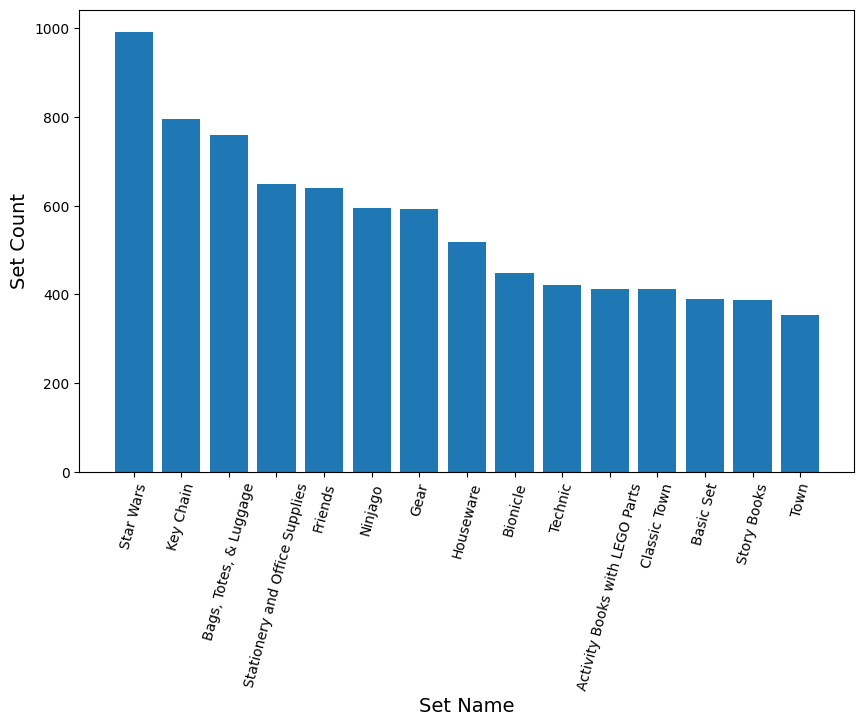

In [121]:
plt.figure(figsize=(10, 6))
plt.bar(
    x="name",
    height="set_count",
    data=merged_df.iloc[:15]
)
plt.xticks(rotation=75)
plt.xlabel("Set Name", fontsize=14)
plt.ylabel("Set Count", fontsize=14)
plt.show()